David Garza Safi


## Regresión lineal simple
 



La felicidad no es algo fácilmente mensurable, aun así, la publicación World Happiness Report
(WHR) ha tratado desde el 2012 de medir los niveles de felicidad de la gran mayoría de los países
del mundo. Los resultados que obtienen año con año se publican de forma abierta, así como los
datos que lograron capturar

La variable de mayor interés para este ejercicio es el nivel general de felicidad por país, evaluado
en una escala del 0 al 10. Una de las variables que en dicho reporte han expuesto como relevante
para determinar la felicidad de una nación es su producto interno bruto, o gross domestic product
(GDP). Los datos de GDP por país se pueden descargar desde el sitio de The World Bank, una
institución financiera internacional.

En este caso, se usara un archivo de nombre “Felicidad y GDP.csv” donde se puede
encontrar el nivel de felicidad del último reporte del WHR (2022) y el GDP (2020) de los países
para los que se cuenta con información. Los datos de niveles de felicidad se descargaron
directamente del sitio de internet del WHR, y los datos de GDP se descargaron del sitio de
internet de The World Bank.

La base de datos cuenta con la siguiente información:

- “Pais”. Se describe el nombre del país.
- “Felicidad”. Un número entre 0 y 10 que describe el nivel de felicidad.
- “GDP”. Un número que describe el producto interno bruto.

Objetivo: 
    Análisis y la visualización de datos usando regresion lineal usando una base de datos para poner en práctica los conocimientos que he adquirido para encontrar un
modelo de regresión lineal simple en el que relaciones la felicidad y el GDP de un país.




#### 1. Se importan los datos del archivo “Felicidad y GDP.csv” a tu ambiente de trabajo. Por curiosidad, revisemos cuáles son los países más felices, así como los que tienen mayor GDP. Especificamente un resumen de 10 filas de la base de datos, previamente ordenada de mayor a menor felicidad. 

In [28]:
import pandas as pd

# Leer el archivo CSV
Data=pd.read_csv('A1.2 Felicidad y GDP.csv') #Lee el archivo
print("\n -10 Paises Mas Felices \n")
print(Data.head(10)) #Mas felices

print("\n -10 Paises Menos Felices \n ")
print(Data.sort_values('Felicidad', ascending=False).tail(10)) #Menos Felices


 -10 Paises Mas Felices 

          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11

 -10 Paises Menos Felices 
 
             Pais  Felicidad           GDP
131        Zambia     3.7598  1.811063e+10
132        Malawi     3.7504  1.217213e+10
133      Tanzania     3.7024  6.240971e+10
134  Sierra Leone     3.5740  4.063289e+09
135       Lesotho     3.5118  2.250718e+09
136      Botswana     3.4711  1.493007e+10
137        Rwanda     3.2682  1.018435e+10
138      Zimbabwe     2.9951  1.805117e+10
139       Lebanon     2.9553  2.594892e+10
140   Afghanistan     2.4038  2.011614e+10


#### 2. Grafica las observaciones, definiendo el valor de “y” como el nivel de felicidad y el valor de “x” como el logaritmo base 10 del GDP. 

Típicamente, cuando se trabajamos con números tan grandes como lo es el GDP, es mucho más común encontrar asociaciones con el logaritmo base 10 de la variable, que con la variable misma.

C:\Users\PC\AppData\Local\Temp\ipykernel_20076\3417798286.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=12, frameon=True)


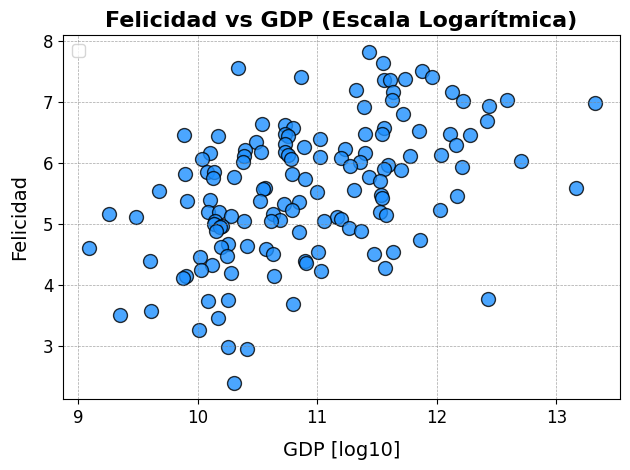

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Limpiar datos: eliminar NaN y valores no válidos
Data = Data.dropna(subset=['GDP', 'Felicidad'])  # Eliminar filas con NaN
Data['GDP'] = pd.to_numeric(Data['GDP'], errors='coerce')  # Convertir a numérico
Data = Data[Data['GDP'] > 0]  # Filtrar GDP > 0

# Calcular logaritmo base 10 de GDP
x = np.log10(Data['GDP'])
y = Data['Felicidad']

# Graficar
plt.scatter(x, y, color='dodgerblue', edgecolor='black', s=100, alpha=0.8)
    # Títulos y etiquetas
plt.title('Felicidad vs GDP (Escala Logarítmica)', fontsize=16, fontweight='bold')
plt.xlabel('GDP [log10]', fontsize=14, labelpad=10)
plt.ylabel('Felicidad', fontsize=14, labelpad=10)
    # Líneas de cuadrícula 
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    # Ajustes de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
    # Leyenda
plt.legend(loc='upper left', fontsize=12, frameon=True)
    # Mostrar la gráfica
plt.tight_layout()
plt.show()

**Grafica 1:**
El gráfico anterior es un diagrama de dispersión que visualiza la relación entre el nivel de felicidad (eje y) y el logaritmo base 10 del GDP (eje x) de varios países. Cada punto representa un país, cuya posición viene determinada por su PIB y su nivel de felicidad. Hecho atraves del codigo anterior.

#### 3. Se calculan los valores óptimos de los dos coeficientes del modelo de regresión lineal simple. 

- El código presentado implementa una regresión lineal simple desde cero, calculando manualmente los coeficientes B0 (intercepto) y B1 (pendiente) de la recta de mejor ajuste. 

In [31]:
#Consigue x e y
xBar=x.mean()
yBar=y.mean()

# Se hacen calculos usando las fórmulas estándar
B1nume=sum((x-xBar)*(y-yBar))
B1den=sum((x-xBar)**2)
B1=B1nume/B1den
B0=yBar-(B1*xBar)

#Imprime Resultados
print("Resultados de Modelo de Regresion Lineal Simple. \n")
print("B0=",B0)
print("B1=",B1)

Resultados de Modelo de Regresion Lineal Simple. 

B0= -1.3023500570747277
B1= 0.6281284658810408


#### 4. Se realiza una nueva gráfica en la que se muestren tanto las observaciones, como la línea
que representa el modelo de regresión lineal simple.

C:\Users\PC\AppData\Local\Temp\ipykernel_20076\3893695403.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=12, frameon=True)


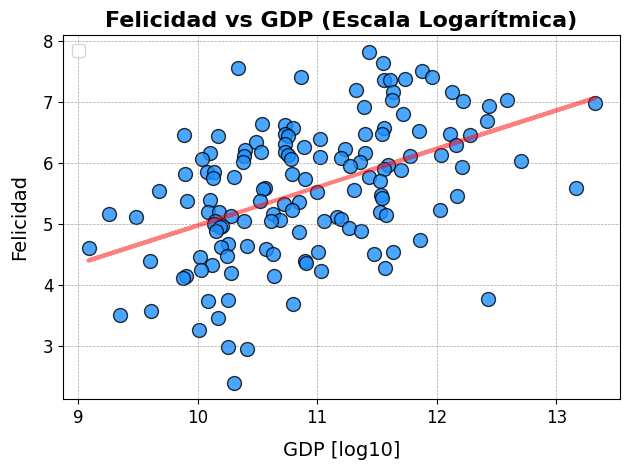

In [33]:
#Fórmula de regresión lineal
yHat=B0+B1*x


# Graficar
plt.scatter(x, y, color='dodgerblue', edgecolor='black', s=100, alpha=0.8)
    # Títulos y etiquetas
plt.title('Felicidad vs GDP (Escala Logarítmica)', fontsize=16, fontweight='bold')
plt.xlabel('GDP [log10]', fontsize=14, labelpad=10)
plt.ylabel('Felicidad', fontsize=14, labelpad=10)
    #Modelo de Regresion Lineal
plt.plot(x,yHat,c="r",linewidth=3,alpha=0.5)
    # Líneas de cuadrícula
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    # Ajustes de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
    # Leyenda
plt.legend(loc='upper left', fontsize=12, frameon=True)
    # Mostrar la gráfica
plt.tight_layout()
plt.show()


**Grafica 2:**
En grafica representa lo mismo que la anterior solo que ahora una línea roja representa el modelo de regresión lineal ajustado a los datos, mostrando la tendencia o asociación entre las dos variables. 

#### 5. Se calcula el RSS del modelo

El **RSS** (Residual Sum of Squares) Formula: $RSS = \sum{(y_i - \hat{y}_i)^2}$



In [32]:
#Calcula el Residual Sum of Squares (RSS) 
RSS=sum((y-yHat)**2)
print("Resultados: \n")
print("Residual Sum of Squares (RSS) =",RSS)

Resultados: 

Residual Sum of Squares (RSS) = 131.3738317732635


#### 6. Calcular el error estándar e intervalo de confianza de 𝛽̂1. Asimismo, determinar si la asociación entre la felicidad y el GDP es significativa en esta población

In [37]:

#Calcular error estándar de la pendiente B1
n=len(x) #Número de observaciones
SEB1=np.sqrt(RSS/((n-2)*sum((x-xBar)**2)))
print("SEB1=",SEB1)
print("\n")

import scipy.stats as st
#Calcular el intervalo de confianza para B1 con nivel de confianza del 95%
per=st.t.interval(confidence=0.95,df=n-2)[1]
Conflow = B1 - per * SEB1
Confhigh = B1 + per * SEB1
print("intervalo de confianza: \n(",Conflow,",",Confhigh,")")



SEB1= 0.09983378435340727


intervalo de confianza: 
( 0.4307393313073311 , 0.8255176004547504 )


Con base en el **Error Estándar** de SEB1 = 0.0998 y el **Intervalo de Confianza** de la pendiente en el rango (0.4307, 0.8255) , podemos concluir que existe una relación **significativa** entre el GDP (en escala logarítmica) y la felicidad de un país.

- El **Error Estándar** relativamente pequeño (0.0998) sugiere que la estimación de la pendiente es precisa.
- El **Intervalo de Confianza** no incluye el valor cero, lo que significa que con un 95% de confianza, podemos afirmar que existe una relación positiva entre el GDP y la felicidad. En otras palabras, a medida que aumenta el GDP de un país, también lo hace la felicidad de su población.

#### 7. Calcular el residual standard error y la 𝑅^2 del modelo

In [39]:
#Residual Standard Error (RSE) y el coeficiente de determinación R^2
RSE=np.sqrt(RSS/(n-2))
#Coeficiente de determinación
TSS=sum((y-yBar)**2)
R2=1-RSS/TSS
print("Calcular el RSE y la R^2 del modelo \n")

print("Residual Standard Error=",RSE)
print("R^2=",R2)

Calcular el residual standard error y la R^2 del modelo 

Residual Standard Error= 0.9721807858537376
R^2= 0.22166361654970657


El Residual Standard Error (RSE) es una medida de cuán bien el modelo de regresión se ajusta a los datos. Un valor pequeño de RSE indica un buen ajuste del modelo.

- **RSE = 0.9722**:  
  El **Error Estándar Residual (RSE)** indica cuánto varían los datos observados en torno a la recta de regresión. En este caso, un **RSE de 0.9722** nos dice que en promedio, las observaciones se desvían en aproximadamente 0.97 unidades de la recta de regresión. Esto implica que si habra un error significativo en el modelo, esto nos dice que el modelo no está explicando completamente la variabilidad de los datos.

- $R^2 = 0.2217$ :  
  El **coeficiente de determinación \( R^2 \)** mide la proporción de la variabilidad en la variable dependiente (felicidad). Un $ R^2 = 0.2217 $ indica que el **21.7%** de la variabilidad de la felicidad. Esto es relativamente bajo, al igual de estar muy lejano a 1 lo que este modelo nos va dar un error muy amplio a comparacion a datos reales.

#### 8. Finalmente, usa la función “OLS()” de la librería statsmodels.api para verificar que los
resultados de todos los puntos anteriores son los esperados. 

In [44]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#Ajuste de la regresión y Imprimir el resumen del modelo ajustado
model=sm.OLS(y,sm.add_constant(x))
results=model.fit() 
print(results.summary())

model=LinearRegression()
model.fit(np.array(x).reshape(-1,1),y) #Ajustar el modelo a los datos

#Resultados
print("\nB0=",model.intercept_)
print("B1=",model.coef_)

print(results.scale**0.5)
print(results.pvalues)


                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        20:57:48   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

**Comentarios del Codigo**

El código utiliza dos librerías populares para ajustar un modelo de regresión lineal: **`statsmodels`** y **`sklearn`**.

- **statsmodels** proporciona un análisis estadístico completo, incluyendo el cálculo del **Error Estándar Residual (RSE)** y el p-value de los coeficientes. Esta herramienta es ideal para profundizar en la interpretación del modelo, especialmente si se desea realizar pruebas de significancia y otros análisis estadísticos.
  
- **sklearn**, por otro lado, se enfoca en la predicción y el ajuste del modelo de forma más eficiente, pero no proporciona detalles estadísticos tan completos como `statsmodels`.

Al calcular el RSE y el **coeficiente de determinación** $ R^2 $, podemos comparar qué tan bien ajusta el modelo a los datos. Si el p-value es bajo, significa que el modelo tiene una relación significativa entre las variables.

Finalmente, si bien ambos métodos ajustan modelos de regresión lineal, la elección de la librería depende del propósito del análisis: **predicción** con `sklearn` o **interpretación estadística detallada** con `statsmodels`.

**Conclusiones**

Con estos resultados, se puede concluir que el GDP tiene una **relación significativa** y positiva con la felicidad. Sin embargo, el $ R^2 $ bajo indica que la relación no explica completamente la variabilidad de la felicidad, lo que sugiere que existen otros factores no incluidos en el modelo que también afectan la felicidad. Esto podría incluir variables como la educación, la salud, la igualdad social, entre otras.

A pesar de esto, el modelo es estadísticamente **significativo** y sugiere que incrementos en el GDP están asociados con mejoras en la felicidad, aunque hay mucho margen para mejorar el modelo.

#### Referencias

- Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2022). World happiness report 2022. Sustainable Development Solutions Network. https://worldhappiness.report/ed/2022/
- World Bank. (n.d.). GDP (current US$). The World Bank. Retrieved January 26, 2025, from https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
